In [1]:
import math
import numpy as np
from scipy.special import eval_legendre
from scipy.integrate import simps
import matplotlib.pyplot as plt

In [6]:
N = 200
E = 0.2

In [7]:
X = np.linspace(-1, 1, N)
F = X/np.abs(X) #step function
F += np.random.normal(0, E, N) #Insert error

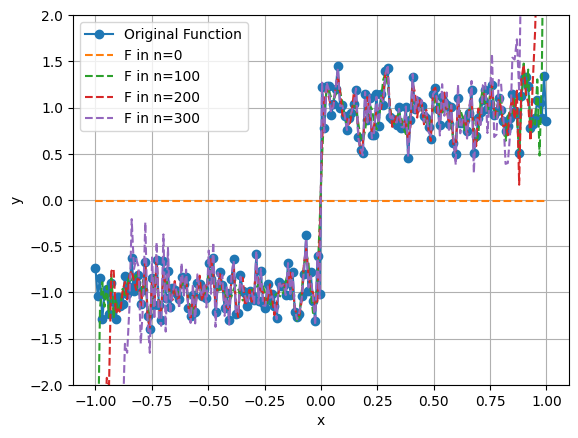

In [8]:
plt.plot(X, F, 'o-', label='Original Function') #graph step function

#calc step function from Expand function in Legendre polynomials
F_nova = np.zeros(len(X))
A = []
Na = 301

for n in range(Na):
    Pn = eval_legendre(n, X)
    an = (n+0.5) * simps(F*Pn, X)
    A.append(n)
    
    F_nova += an*Pn
    if n%100 ==0:
        plt.plot(X, F_nova, '--', label=f'F in n={n}')

plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-2, 2)
plt.legend(loc='upper left')
plt.grid()
plt.show()

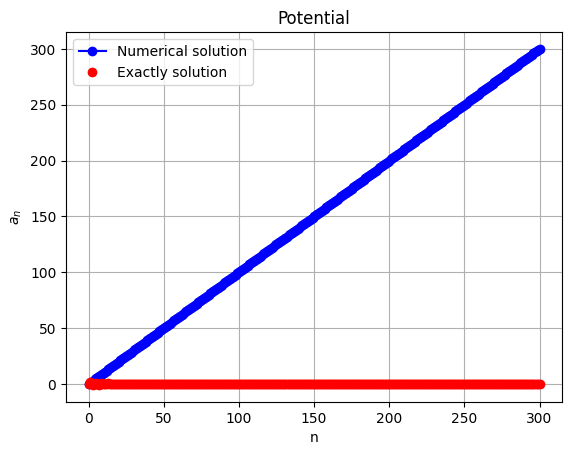

In [9]:
#Graph find numerical potential
plt.figure()
plt.xlabel('n')
plt.ylabel('$a_n$')
plt.title('Potential')
plt.plot(A, 'bo-', label='Numerical solution')
plt.grid()

#graph from analit numerical potential
a_exactly = np.zeros(Na)
for i in range(Na):
    if i%2==1:
        k = int((i-1)/2.0)
        num = (-1)**k*math.factorial(2*k)*(4*k+3)
        den = 2**i * math.factorial(k)*math.factorial(k+1)
        a_exactly[i] = num/den
        
plt.plot(a_exactly, 'ro', label='Exactly solution')
plt.legend()
plt.show()